## House Prices Prediction

The goal is to predict house prices based on other features. 

---

In [1]:
# Import libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset

house_df = pd.read_csv('~/Documents/GitHub/real-application/data/house_prices.csv', encoding = 'ISO-8859-1')
house_df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
# House information

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# House summary

house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

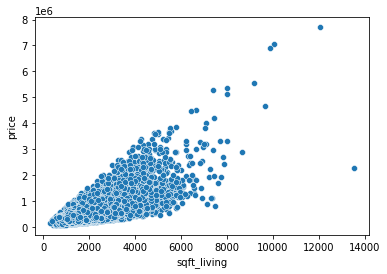

In [5]:
# Vizualization for sqft_living vs price

sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

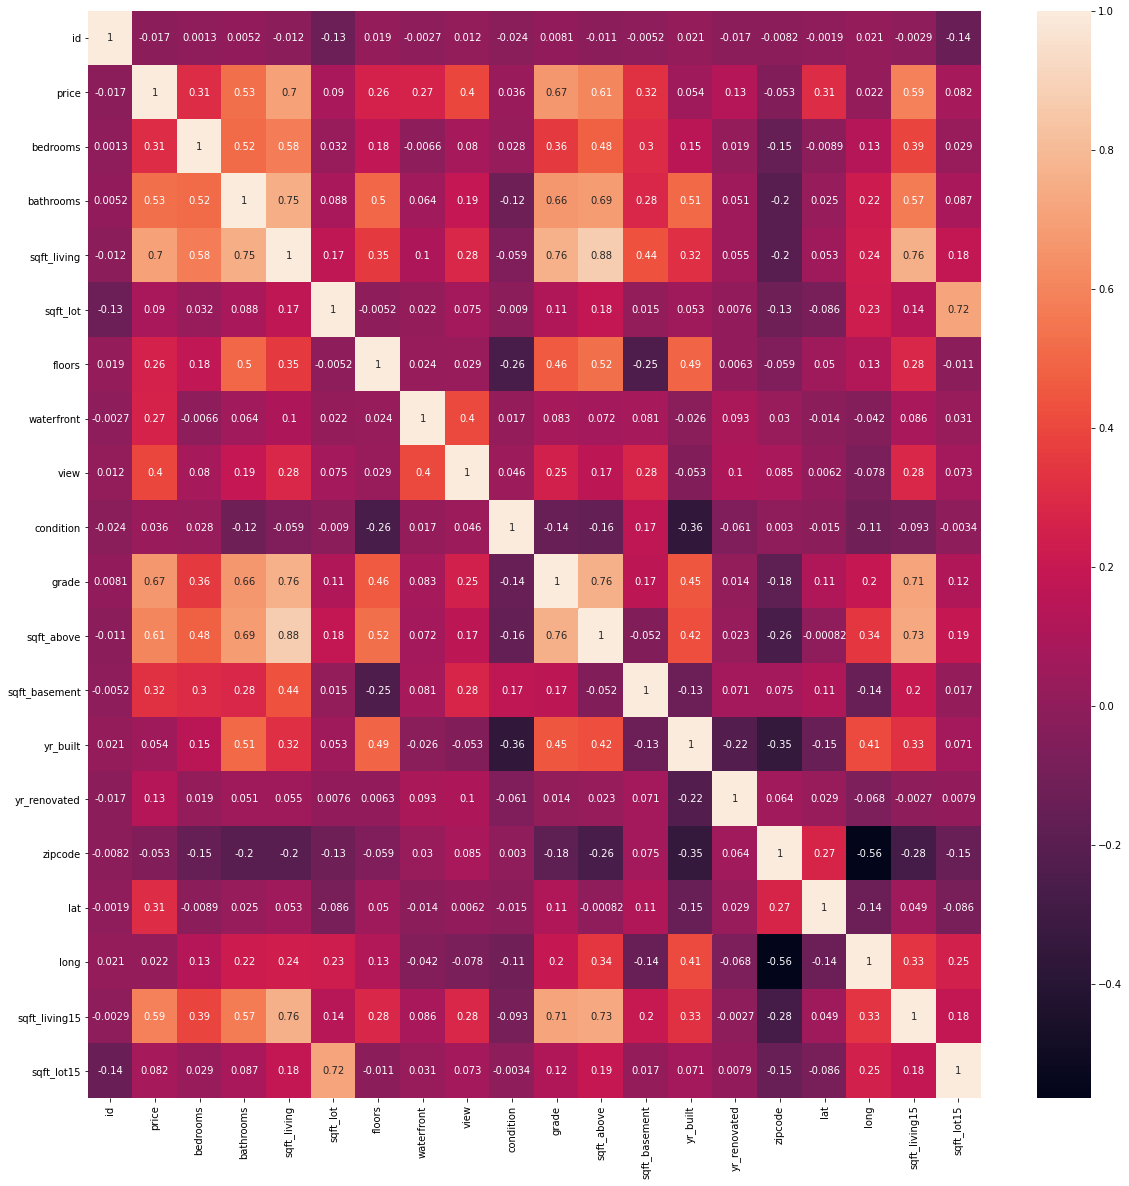

In [6]:
# House correlation 

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True);

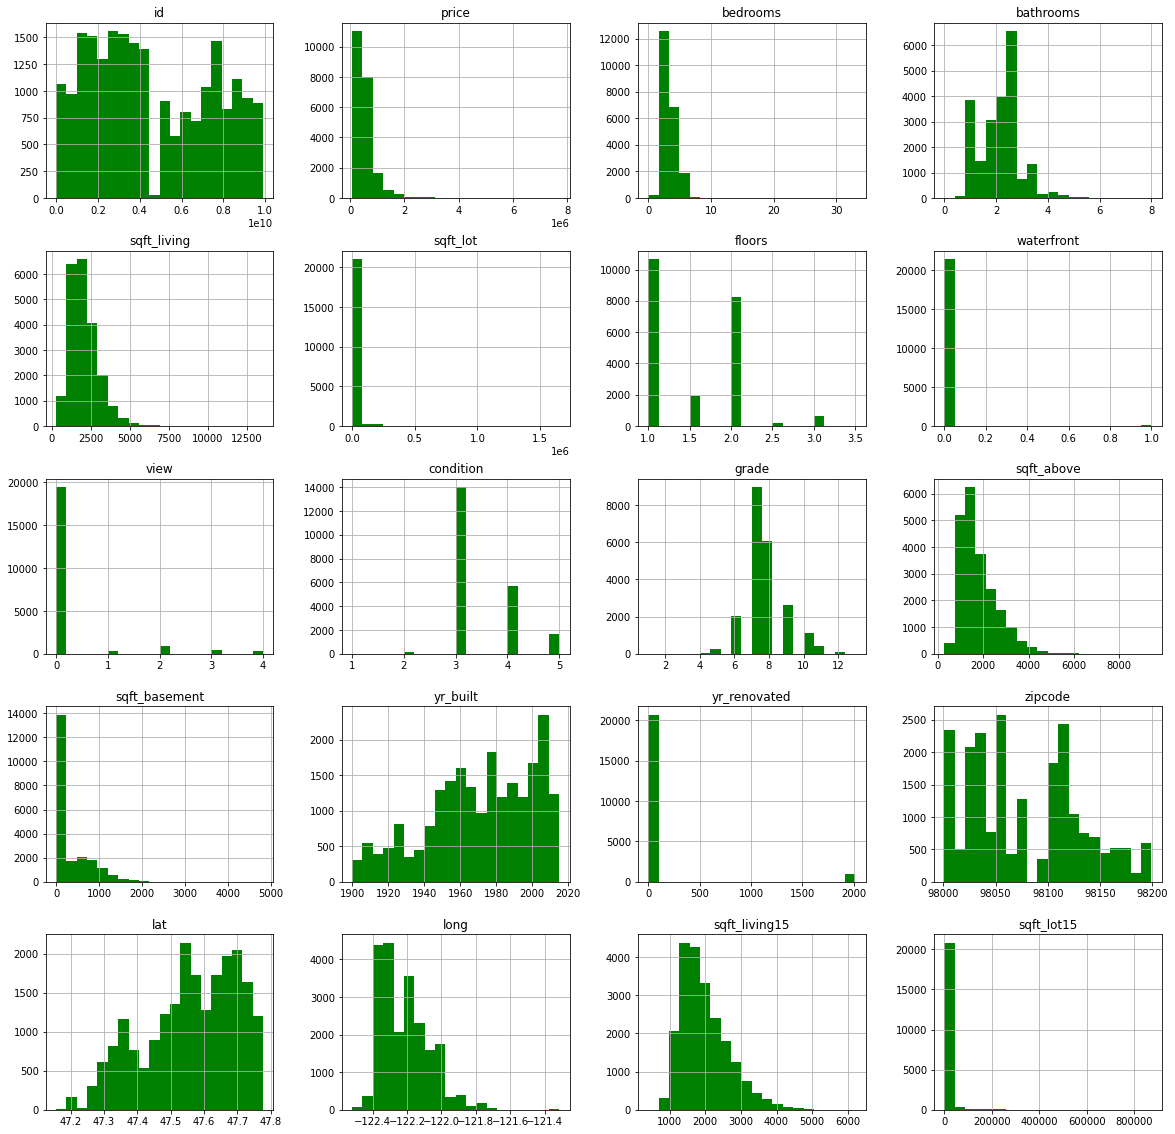

In [7]:
# House histograms 

house_df.hist(bins = 20, figsize = (20,20), color = 'g');

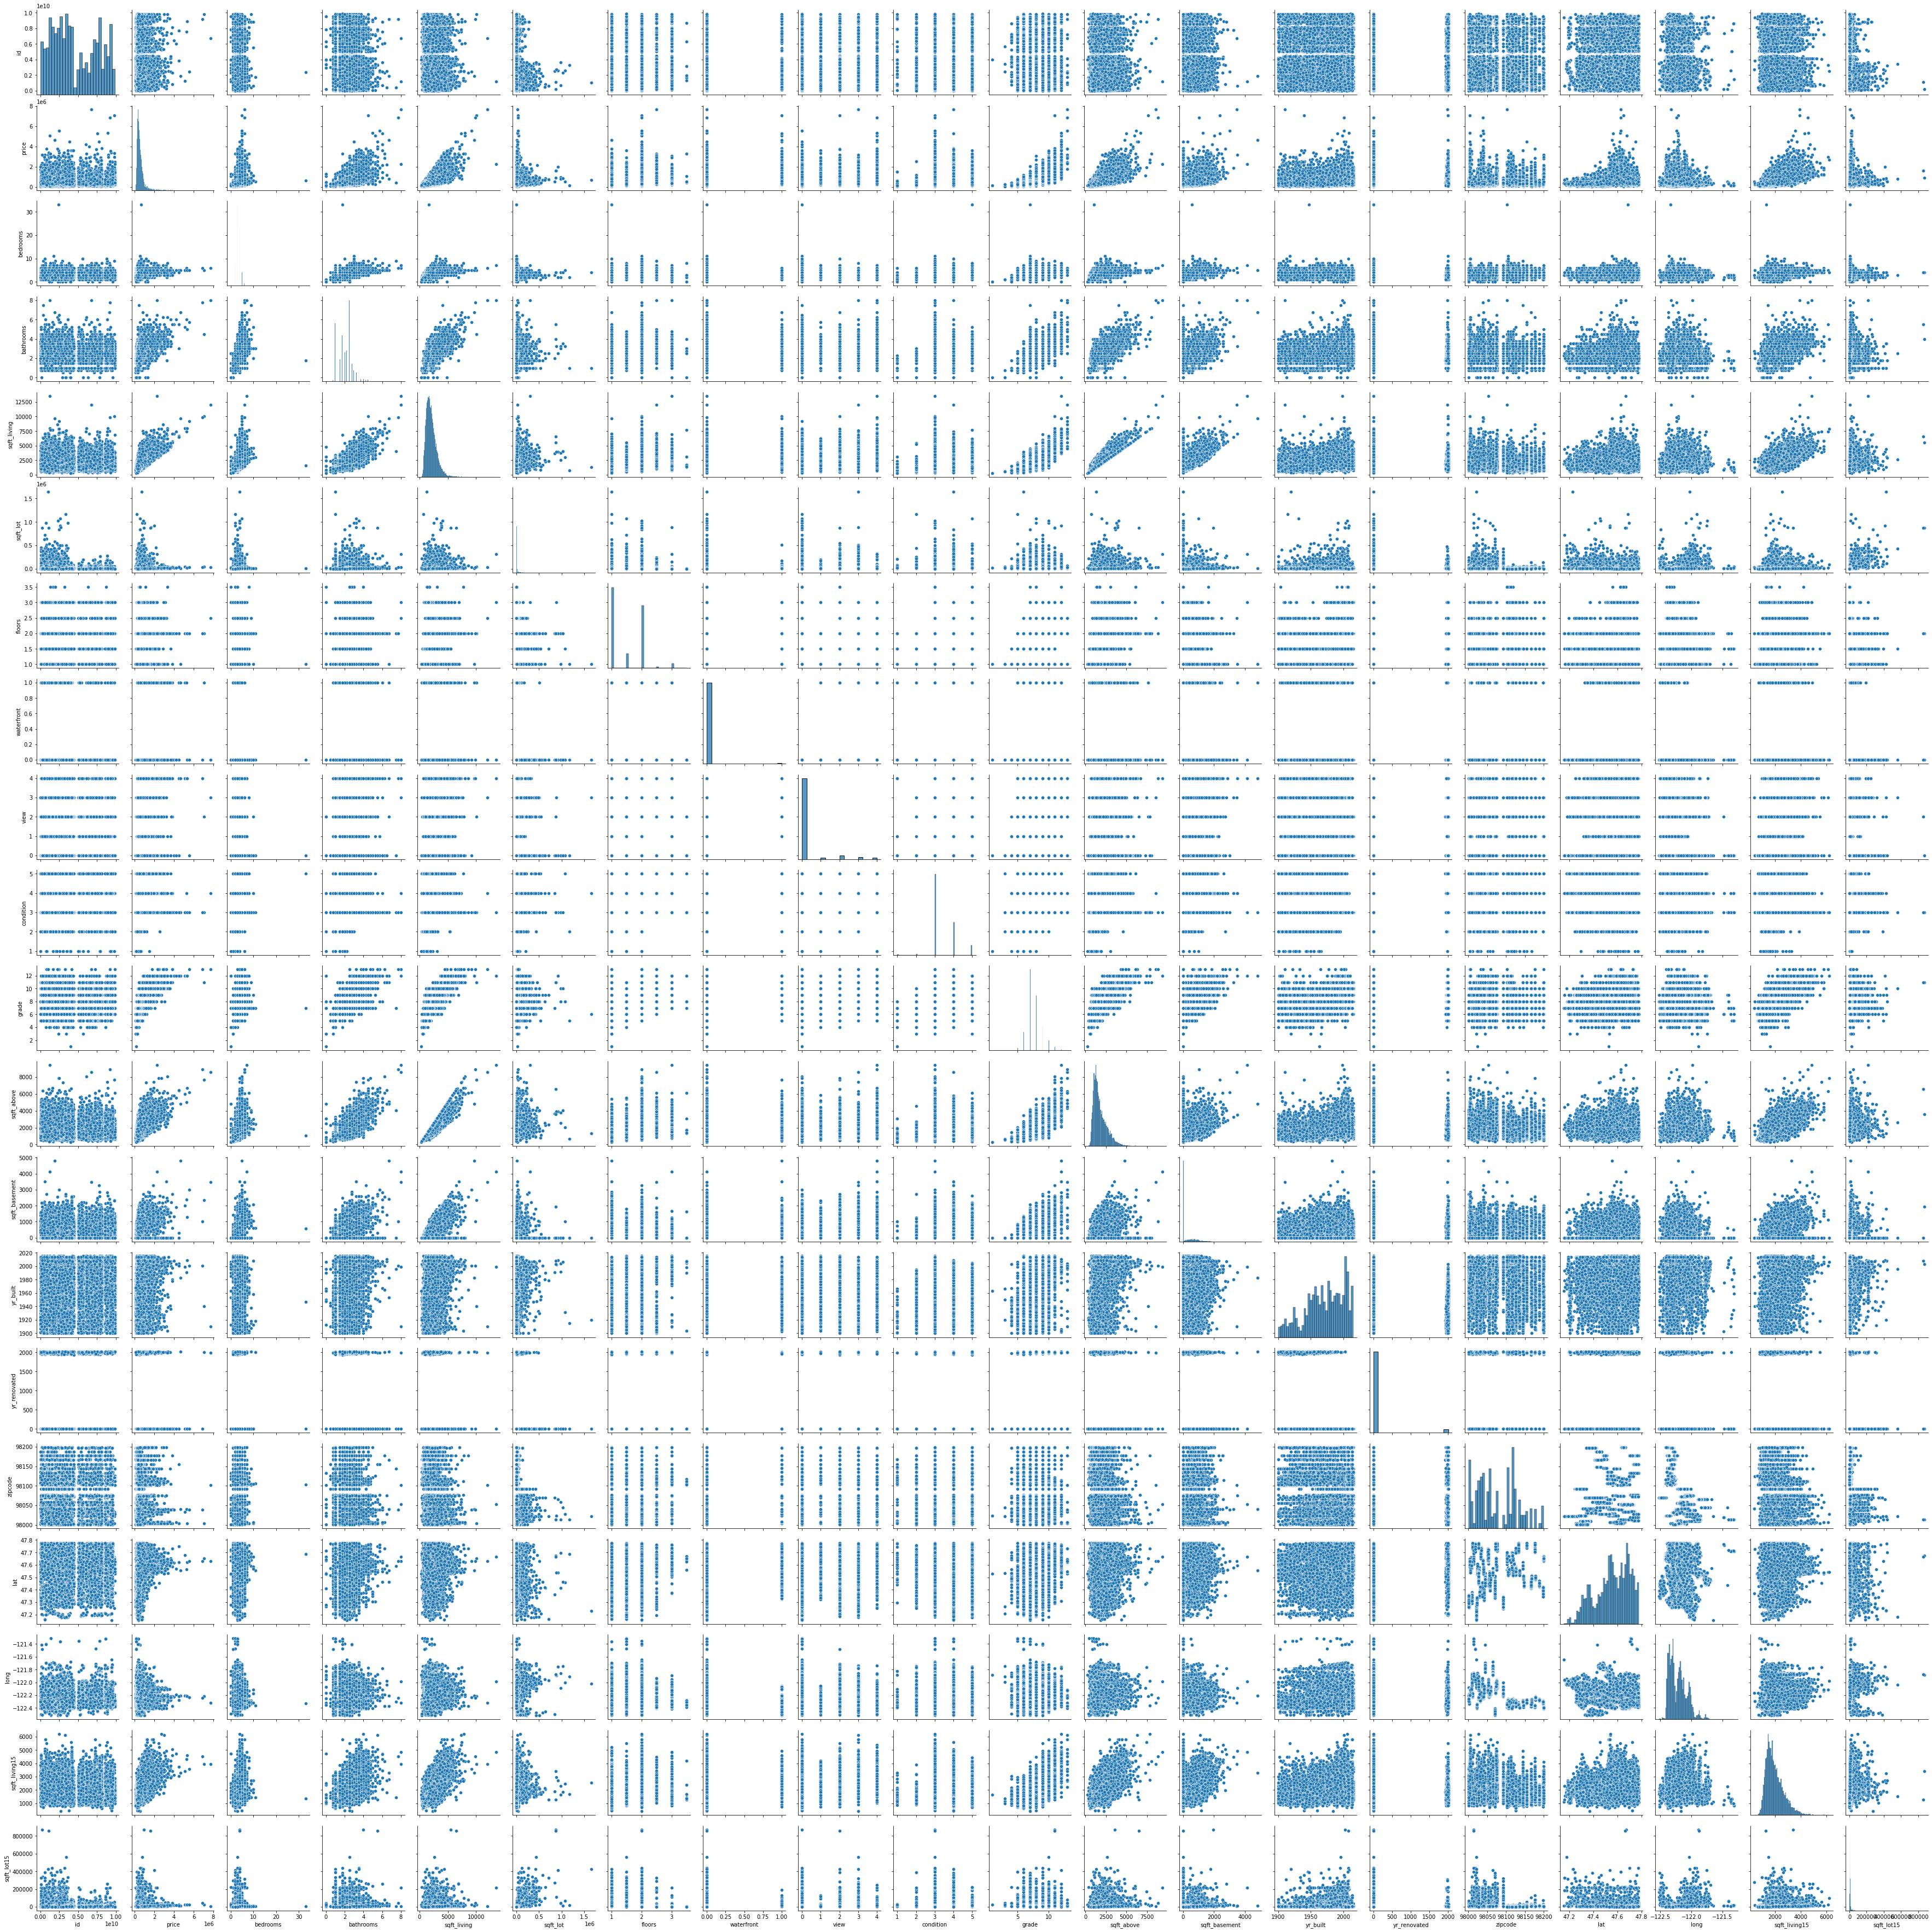

In [8]:
# House pairplot

sns.pairplot(house_df);

In [9]:
# Selected features

selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [10]:
# Selected features dataset for predictors

X = house_df[selected_features]
print(X.shape)
X.head()

(21613, 7)


bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0         3       1.00         1180      5650     1.0        1180   
1         3       2.25         2570      7242     2.0        2170   
2         2       1.00          770     10000     1.0         770   
3         4       3.00         1960      5000     1.0        1050   
4         3       2.00         1680      8080     1.0        1680   

   sqft_basement  
0              0  
1            400  
2              0  
3            910  
4              0

In [11]:
# Response variable

y = house_df['price']
print(y.shape)
y.head()

(21613,)


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [12]:
# Scale for predictor features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
print(X_scaled)

(21613, 7)
[[0.09090909 0.125      0.06716981 ... 0.         0.09758772 0.        ]
 [0.09090909 0.28125    0.17207547 ... 0.4        0.20614035 0.08298755]
 [0.06060606 0.125      0.03622642 ... 0.         0.05263158 0.        ]
 ...
 [0.06060606 0.09375    0.05509434 ... 0.4        0.08004386 0.        ]
 [0.09090909 0.3125     0.09886792 ... 0.4        0.14364035 0.        ]
 [0.06060606 0.09375    0.05509434 ... 0.4        0.08004386 0.        ]]


In [13]:
# Scaler Max values

scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [14]:
# Scaler Min values

scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [16]:
# Reshape response variable

y = y.values.reshape(-1,1)

In [17]:
y_scaled = scaler.fit_transform(y)

In [18]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [19]:
# Split house dataframe into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [20]:
X_train.shape

(16209, 7)

In [21]:
X_test.shape

(5404, 7)

In [22]:
# Build the ANN model 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the ANN model

model.compile(optimizer='Adam', loss='mean_squared_error')

In [24]:
# Train the ANN model

epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 9.8738e-04 - val_loss: 0.0011
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 9.9986e-04 - val_loss: 0.0011
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 9.9088e-04 - val_loss: 0.0011
Epoch 8/100
260/260 [==============================] - 0s 1ms/step - loss: 9.7956e-04 - val_loss: 0.0011
Epoch 9/100
260/260 [==============================] - 0s 2ms/step - loss: 9.6185e-04 - val_loss: 0.0012
Epoch 10/100
260/260 [==============================] - 0s 1ms/step - l

260/260 [==============================] - 0s 2ms/step - loss: 8.7920e-04 - val_loss: 0.0011
Epoch 79/100
260/260 [==============================] - 0s 2ms/step - loss: 8.7930e-04 - val_loss: 0.0011
Epoch 80/100
260/260 [==============================] - 0s 2ms/step - loss: 8.7924e-04 - val_loss: 0.0011
Epoch 81/100
260/260 [==============================] - 0s 2ms/step - loss: 8.8830e-04 - val_loss: 0.0012
Epoch 82/100
260/260 [==============================] - 0s 1ms/step - loss: 8.7622e-04 - val_loss: 0.0011
Epoch 83/100
260/260 [==============================] - 0s 1ms/step - loss: 8.6976e-04 - val_loss: 0.0011
Epoch 84/100
260/260 [==============================] - 0s 1ms/step - loss: 8.7713e-04 - val_loss: 0.0012
Epoch 85/100
260/260 [==============================] - 1s 2ms/step - loss: 8.8251e-04 - val_loss: 0.0012
Epoch 86/100
260/260 [==============================] - 0s 2ms/step - loss: 8.9348e-04 - val_loss: 0.0011
Epoch 87/100
260/260 [==============================] - 0s 

In [25]:
# Evaluate teh ANN model

epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

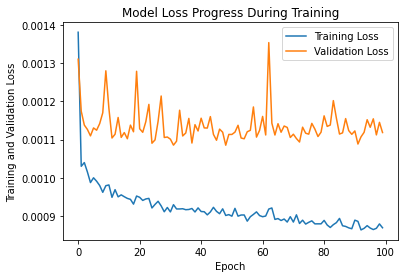

In [27]:
# Plot loss and val_loss function

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

In [28]:
# Prediction for 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'

X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[196780.75]], dtype=float32)

Text(0, 0.5, 'True Values')

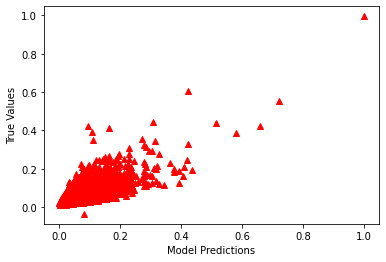

In [30]:
# Plot the prediction

y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [32]:
# Scale the prediction

y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

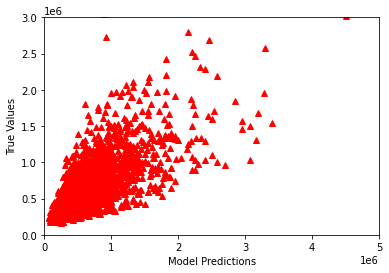

In [34]:
# Scale the plot

plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [35]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [37]:
# RMSE, MSE, MAE, R2, Adjusted R2

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 240047.719 
MSE = 57622907195.72846 
MAE = 156009.35175622226 
R2 = 0.5832579163310645 
Adjusted R2 = 0.5827172946509899


In [38]:
# Increased number of feautures (independant variables)

selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [39]:
# Scale independant variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Dependant variable

y = house_df['price']

In [41]:
# Reshape dependant variable & split train & test variables

y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [42]:
# Build the ANN model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [43]:
# Compile the ANN model

model.compile(optimizer='Adam', loss='mean_squared_error')

In [44]:
# Train the ANN model

epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 7.2561e-04
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 5.7769e-04 - val_loss: 7.1967e-04
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 5.1716e-04 - val_loss: 6.2166e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 4.8407e-04 - val_loss: 5.4949e-04
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 4.3454e-04 - val_loss: 5.0656e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 4.2071e-04 - val_loss: 4.6410e-04
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 3.9702e-04 - val_loss: 5.0824e-04
Epoch 8/100
260/260 [==============================] - 0s 1ms/step - loss: 3.9441e-04 - val_loss: 4.5659e-04
Epoch 9/100
260/260 [==============================] - 0s 2ms/step - loss: 3.7307e-04 - val_loss: 4.7200e-04
Epoch 10/100
260/260 [=

260/260 [==============================] - 0s 1ms/step - loss: 2.0227e-04 - val_loss: 3.1227e-04
Epoch 76/100
260/260 [==============================] - 0s 1ms/step - loss: 2.0654e-04 - val_loss: 3.8848e-04
Epoch 77/100
260/260 [==============================] - 0s 1ms/step - loss: 1.7699e-04 - val_loss: 3.0137e-04
Epoch 78/100
260/260 [==============================] - 0s 1ms/step - loss: 1.6154e-04 - val_loss: 2.9318e-04
Epoch 79/100
260/260 [==============================] - 0s 1ms/step - loss: 1.5360e-04 - val_loss: 2.9746e-04
Epoch 80/100
260/260 [==============================] - 0s 1ms/step - loss: 1.6609e-04 - val_loss: 2.9825e-04
Epoch 81/100
260/260 [==============================] - 0s 1ms/step - loss: 1.6924e-04 - val_loss: 3.1025e-04
Epoch 82/100
260/260 [==============================] - 0s 1ms/step - loss: 2.0082e-04 - val_loss: 2.9870e-04
Epoch 83/100
260/260 [==============================] - 0s 1ms/step - loss: 1.5924e-04 - val_loss: 3.3234e-04
Epoch 84/100
260/260 [=

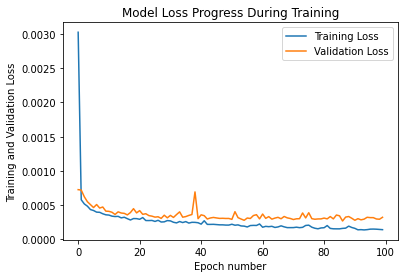

In [46]:
# Evaluate the ANN model, plot loss and val_loss function

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss']);

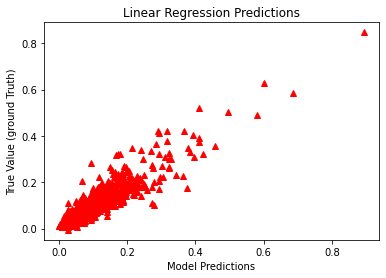

In [47]:
# Plot prediction 

y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [48]:
# Scale 

y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [49]:
# RMSE, MSE, MAE, R2, Adjusted R2  


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 125900.553 
MSE = 15850949269.105963 
MAE = 72458.38927978696 
R2 = 0.876125061294022 
Adjusted R2 = 0.8759643636344702
